In [19]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [20]:
file_name = "SPC_TRADE_FOOD.csv"
file_path = "data/SPC/"

# Open CSV file in pandas
df_raw = pd.read_csv(file_path + file_name)

In [21]:
# Get column name
df_column_name = list(df_raw.columns.values)
for el in df_column_name:
    print(el)

DATAFLOW
FREQ: Frequency
INDICATOR: Indicator
IMPORTER: Importer
EXPORTER: Exporter
COMMODITY: Commodity
TIME_PERIOD: Time
OBS_VALUE
UNIT_MEASURE: Unit of measure
UNIT_MULT: Unit multiplier
OBS_STATUS: Observation Status
DATA_SOURCE: Data source
OBS_COMMENT: Comment


In [22]:
# Get unique value of each column
for el in df_column_name:
    print(el)
    print(df_raw[el].unique())

DATAFLOW
['SPC:DF_TRADE_FOOD(1.0)']
FREQ: Frequency
['A: Annual']
INDICATOR: Indicator
['Q: Quantity']
IMPORTER: Importer
['CK: Cook Islands' 'MH: Marshall Islands' 'TO: Tonga' 'VU: Vanuatu'
 'KI: Kiribati' 'NC: New Caledonia' 'NR: Nauru'
 'FM: Federated State of Micronesia' 'PW: Palau' 'NU: Niue'
 'PG: Papua New Guinea' 'WS: Samoa' 'FJ: Fiji' 'SB: Solomon Islands'
 'PF: French Polynesia' 'TV: Tuvalu' 'WF: Wallis and Futuna Islands'
 'TK: Tokelau']
EXPORTER: Exporter
['AU_NZ: Australia and New Zealand']
COMMODITY: Commodity
['03: Fish, crustaceans, molluscs, aquatic invertebrates ne'
 '09: Coffee, tea, mate and spices'
 '24: Tobacco and manufactured tobacco substitutes'
 '19: Cereal, flour, starch, milk preparations and products'
 '11: Milling products, malt, starches, inulin, wheat glute'
 '20: Vegetable, fruit, nut, etc food preparations'
 '15: Animal,vegetable fats and oils, cleavage products, et'
 '07: Edible vegetables and certain roots and tubers'
 '04: Dairy products, eggs, hone

# Column detail
- DATAFLOW --> SPC:DF_TRADE_FOOD(1.0)
- FREQ: Frequency --> A: Annual
- INDICATOR: Indicator --> Q: Quantity
- IMPORTER: Importer
    - 'CK: Cook Islands'
    - 'MH: Marshall Islands'
    - 'TO: Tonga'
    - 'VU: Vanuatu'
    - 'KI: Kiribati'
    - 'NC: New Caledonia'
    - 'NR: Nauru'
    - 'FM: Federated State of Micronesia'
    - 'PW: Palau'
    - 'NU: Niue'
    - 'PG: Papua New Guinea'
    - 'WS: Samoa'
    - 'FJ: Fiji'
    - 'SB: Solomon Islands'
    - 'PF: French Polynesia'
    - 'TV: Tuvalu'
    - 'WF: Wallis and Futuna Islands'
    - 'TK: Tokelau'
- EXPORTER: Exporter --> AU_NZ: Australia and New Zealand'
- COMMODITY: Commodity -->
    - '02: Meat and edible meat offal'
    - '03: Fish, crustaceans, molluscs, aquatic invertebrates ne'
    - '04: Dairy products, eggs, honey, edible animal product nes'
    - '07: Edible vegetables and certain roots and tubers'
    - '08: Edible fruit, nuts, peel of citrus fruit, melons'
    - '09: Coffee, tea, mate and spices'
    - '10: Cereals'
    - '11: Milling products, malt, starches, inulin, wheat glute'
    - '12: Oil seed, oleagic fruits, grain, seed, fruit, etc, ne'
    - '15: Animal,vegetable fats and oils, cleavage products, et'
    - '16: Meat, fish and seafood food preparations nes'
    - '17: Sugars and sugar confectionery'
    - '18: Cocoa and cocoa preparations'
    - '19: Cereal, flour, starch, milk preparations and products'
    - '20: Vegetable, fruit, nut, etc food preparations'
    - '21: Miscellaneous edible preparations'
    - '22: Beverages, spirits and vinegar'
    - '24: Tobacco and manufactured tobacco substitutes'
- TIME_PERIOD: Time --> 1995 --> 2018
- OBS_VALUE --> quantité échangée
- UNIT_MEASURE: Unit of measure --> 'TON: tonnes'
- UNIT_MULT: Unit multiplier --> nan
- OBS_STATUS: Observation Status --> nan
- DATA_SOURCE: Data source --> nan
- OBS_COMMENT: Comment --> nan

In [23]:
# Suppression des colonnes non utiles pour l'analyse (mono valeur ou vide)
df_net = df_raw.drop(columns=['DATAFLOW', 'FREQ: Frequency', 'INDICATOR: Indicator', 'UNIT_MULT: Unit multiplier',
                          'OBS_STATUS: Observation Status', 'DATA_SOURCE: Data source', 'OBS_COMMENT: Comment', 'UNIT_MEASURE: Unit of measure', 'EXPORTER: Exporter'])
# print(df_net)


In [24]:
# 1 - Analyse
total_import_ton = df_net['OBS_VALUE'].sum()
print(total_import_ton)
df_importer_raw = df_net.groupby('IMPORTER: Importer').agg({'OBS_VALUE': 'sum'}).sort_values('OBS_VALUE', ascending=False)
df_importer_raw['PCT_OBS_VALUE'] = round(df_importer_raw['OBS_VALUE']*100/total_import_ton, 2)
df_importer_raw['PCT_OBS_VALUE_CUMSUM'] = round(df_importer_raw['PCT_OBS_VALUE'].cumsum(), 2)
print(df_importer_raw)

16553168
                                   OBS_VALUE  PCT_OBS_VALUE  \
IMPORTER: Importer                                            
PG: Papua New Guinea                 6164353          37.24   
FJ: Fiji                             5563815          33.61   
NC: New Caledonia                    1638534           9.90   
PF: French Polynesia                  952278           5.75   
SB: Solomon Islands                   510759           3.09   
WS: Samoa                             432258           2.61   
KI: Kiribati                          301912           1.82   
TO: Tonga                             269462           1.63   
VU: Vanuatu                           228381           1.38   
CK: Cook Islands                      216256           1.31   
NR: Nauru                              74767           0.45   
FM: Federated State of Micronesia      66299           0.40   
WF: Wallis and Futuna Islands          60606           0.37   
TV: Tuvalu                             30151  

(0.0, 101.0)

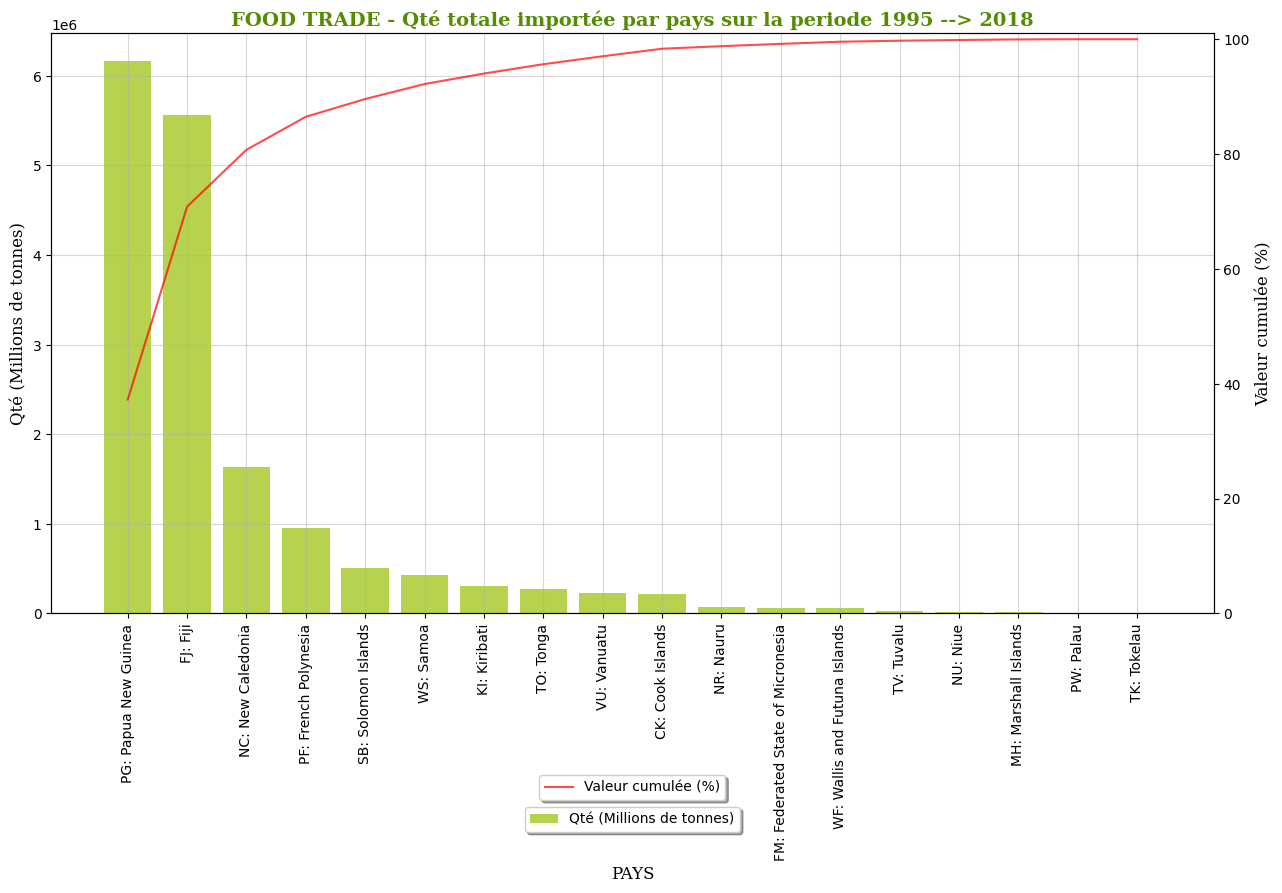

In [25]:
# 1 - Graphique
# Paramètres Titre
graph_title = "FOOD TRADE - Qté totale importée par pays sur la periode 1995 --> 2018"
title_family = 'serif'   # 'serif' | 'sans-serif' | 'cursive' | 'fantasy' | 'monospace'
title_color = '#558C03'
title_weight = 'bold'     # 'normal' | 'bold' | 'heavy' | 'light' | 'ultrabold' | 'ultralight'
title_size = 14
title_x = 0.5
title_y = 1

# Paramètres d'axes
x_label = "PAYS"
xtick_rotation = 90

xy_label_family = 'serif'
xy_label_color = 'black'
xy_label_weight = 'light'
xy_label_size = 12

y1_color = '#97BF04'
y1_alpha = 0.7
y1_label = 'Qté (Millions de tonnes)'

y2_color = 'red'
y2_alpha = 0.7
y2_label = 'Valeur cumulée (%)'

graph_linestyle = 'solid'

# Paramètres grille
grid_alpha = 0.5

###########################################################################################################
fig, axe1 = plt.subplots(nrows=1, ncols=1, figsize=(15, 10), sharex=True)
fig.subplots_adjust(bottom=0.3)

plt.xticks(rotation=xtick_rotation)

# Axe n°1
axe1.set_title(graph_title, x=title_x, y=title_y, fontdict={'family': title_family, 'color': title_color, 'weight': title_weight, 'size': title_size})
axe1.set_xlabel(x_label, fontdict={'family': xy_label_family, 'color': xy_label_color, 'weight': xy_label_weight, 'size': xy_label_size})
axe1.set_ylabel(y1_label, fontdict={'family': xy_label_family, 'color': xy_label_color, 'weight': xy_label_weight, 'size': xy_label_size})

axe1.bar(df_importer_raw.index.values, df_importer_raw.OBS_VALUE,color=y1_color, alpha=y1_alpha, label=y1_label)
axe1.legend(loc="center", bbox_to_anchor=(0, 0, 1, -0.71),ncol=1, fancybox=True, shadow=True)
axe1.grid(True, alpha=grid_alpha)

# Axe n°2
axe2 = axe1.twinx()
axe2.set_ylabel(y2_label, fontdict={'family': xy_label_family, 'color': xy_label_color, 'weight': xy_label_weight, 'size': xy_label_size})

axe2.plot(df_importer_raw.index.values, df_importer_raw.PCT_OBS_VALUE_CUMSUM,color=y2_color, linestyle=graph_linestyle, alpha=y2_alpha, label=y2_label)

axe2.legend(loc="center", bbox_to_anchor=(0, 0, 1, -0.6),ncol=1, fancybox=True, shadow=True)
axe2.set_ylim(0, 101)

# 1 - Notes
- 80% des qté sont importées par 3 des 18 pays dont l'immense majorité (70%) par 2 pays

In [26]:
# 2 - Analyse
total_import_ton = df_net['OBS_VALUE'].sum()
df_commodity_raw = df_net.groupby('COMMODITY: Commodity').agg({'OBS_VALUE': 'sum'}).sort_values('OBS_VALUE', ascending=False)
df_commodity_raw['PCT_OBS_VALUE'] = round(df_commodity_raw['OBS_VALUE']*100/total_import_ton, 2)
df_commodity_raw['PCT_OBS_VALUE_CUMSUM'] = round(df_commodity_raw['PCT_OBS_VALUE'].cumsum(), 2)
print(df_commodity_raw)

                                                    OBS_VALUE  PCT_OBS_VALUE  \
COMMODITY: Commodity                                                           
10: Cereals                                           8461561          51.12   
02: Meat and edible meat offal                        1916937          11.58   
07: Edible vegetables and certain roots and tubers    1333996           8.06   
04: Dairy products, eggs, honey, edible animal ...     963066           5.82   
11: Milling products, malt, starches, inulin, w...     806837           4.87   
17: Sugars and sugar confectionery                     793422           4.79   
22: Beverages, spirits and vinegar                     455437           2.75   
15: Animal,vegetable fats and oils, cleavage pr...     330044           1.99   
20: Vegetable, fruit, nut, etc food preparations       309432           1.87   
08: Edible fruit, nuts, peel of citrus fruit, m...     289400           1.75   
19: Cereal, flour, starch, milk preparat

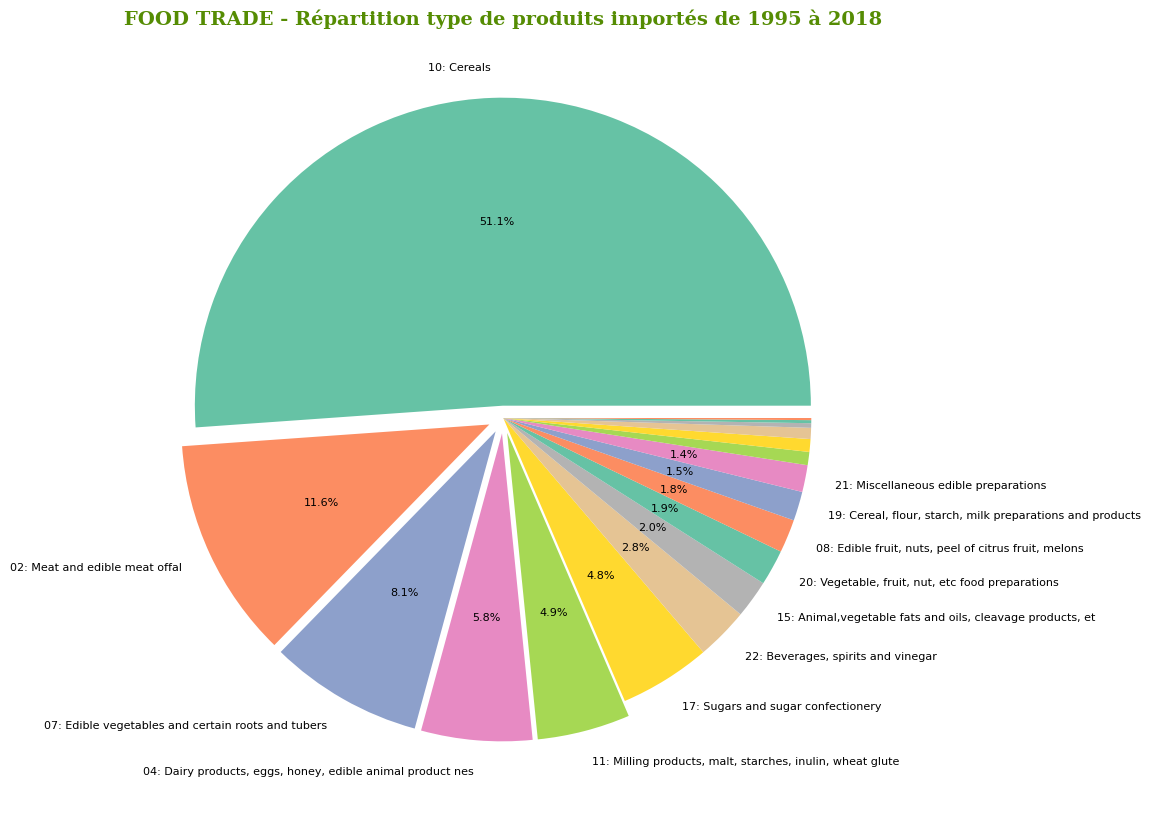

In [34]:
# Graphique GTF_1
graph_title = "FOOD TRADE - Répartition type de produits importés de 1995 à 2018"
title_family = 'serif'  # 'serif' | 'sans-serif' | 'cursive' | 'fantasy' | 'monospace'
title_color = '#558C03'
# 'normal' | 'bold' | 'heavy' | 'light' | 'ultrabold' | 'ultralight'
title_weight = 'bold'
title_size = 14
title_x = 0.5
title_y = 1

fig, axe1 = plt.subplots(nrows=1, ncols=1, figsize=(20, 10), sharex=True)
axe1.set_title(graph_title, x=title_x, y=title_y, fontdict={
               'family': title_family, 'color': title_color, 'weight': title_weight, 'size': title_size})


def autopct_tunning(p): return '{:1.1f}%'.format(p) if p > 1 else None


axe1.pie(df_commodity_raw['PCT_OBS_VALUE'],
         labels=[x if df_commodity_raw.loc[df_commodity_raw.index.values == x, 'PCT_OBS_VALUE'].iloc[0] > 1 else '' for x in df_commodity_raw.index.values], 
         autopct=autopct_tunning, 
         textprops={'fontsize': 8},
         colors=sns.color_palette('Set2'),
         explode=[0.04, 0.05, 0.05, 0.05, 0.05, 0,0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0])

# axe1.legend(loc="center", bbox_to_anchor=(0, 0, 0, 0),
#             ncol=2, fancybox=True, shadow=True)

plt.show()

In [44]:
# 3 - Analyse
total_import_ton = df_net['OBS_VALUE'].sum()
df_commodity_importer = df_net.groupby(['COMMODITY: Commodity', 'IMPORTER: Importer'], as_index=False).agg({'OBS_VALUE': 'sum'})
df_pivot_commodity_importer = df_commodity_importer.pivot_table(columns='IMPORTER: Importer', index='COMMODITY: Commodity', values='OBS_VALUE')
df_pivot_commodity_importer.loc[:,'Total'] = df_pivot_commodity_importer.sum(numeric_only=True, axis=1)
df_pivot_commodity_importer = df_pivot_commodity_importer.sort_values(by=['Total'], ascending=False)
df_pivot_commodity_importer = df_pivot_commodity_importer[df_pivot_commodity_importer.sum().sort_values(ascending = False).index]
df_pivot_commodity_importer = df_pivot_commodity_importer.iloc[:, :].apply(lambda x: (x*100 / x.sum()))
print(df_pivot_commodity_importer)

IMPORTER: Importer                                      Total  \
COMMODITY: Commodity                                            
10: Cereals                                         51.117472   
02: Meat and edible meat offal                      11.580484   
07: Edible vegetables and certain roots and tubers   8.058856   
04: Dairy products, eggs, honey, edible animal ...   5.818016   
11: Milling products, malt, starches, inulin, w...   4.874215   
17: Sugars and sugar confectionery                   4.793173   
22: Beverages, spirits and vinegar                   2.751359   
15: Animal,vegetable fats and oils, cleavage pr...   1.993842   
20: Vegetable, fruit, nut, etc food preparations     1.869322   
08: Edible fruit, nuts, peel of citrus fruit, m...   1.748306   
19: Cereal, flour, starch, milk preparations an...   1.529780   
21: Miscellaneous edible preparations                1.414956   
16: Meat, fish and seafood food preparations nes     0.685313   
03: Fish, crustaceans, mo

In [45]:
from matplotlib.colors import LogNorm, Normalize


[Text(0, 0.5, '10: Cereals'),
 Text(0, 1.5, '02: Meat and edible meat offal'),
 Text(0, 2.5, '07: Edible vegetables and certain roots and tubers'),
 Text(0, 3.5, '04: Dairy products, eggs, honey, edible animal product nes'),
 Text(0, 4.5, '11: Milling products, malt, starches, inulin, wheat glute'),
 Text(0, 5.5, '17: Sugars and sugar confectionery'),
 Text(0, 6.5, '22: Beverages, spirits and vinegar'),
 Text(0, 7.5, '15: Animal,vegetable fats and oils, cleavage products, et'),
 Text(0, 8.5, '20: Vegetable, fruit, nut, etc food preparations'),
 Text(0, 9.5, '08: Edible fruit, nuts, peel of citrus fruit, melons'),
 Text(0, 10.5, '19: Cereal, flour, starch, milk preparations and products'),
 Text(0, 11.5, '21: Miscellaneous edible preparations'),
 Text(0, 12.5, '16: Meat, fish and seafood food preparations nes'),
 Text(0, 13.5, '03: Fish, crustaceans, molluscs, aquatic invertebrates ne'),
 Text(0, 14.5, '12: Oil seed, oleagic fruits, grain, seed, fruit, etc, ne'),
 Text(0, 15.5, '24: Tob

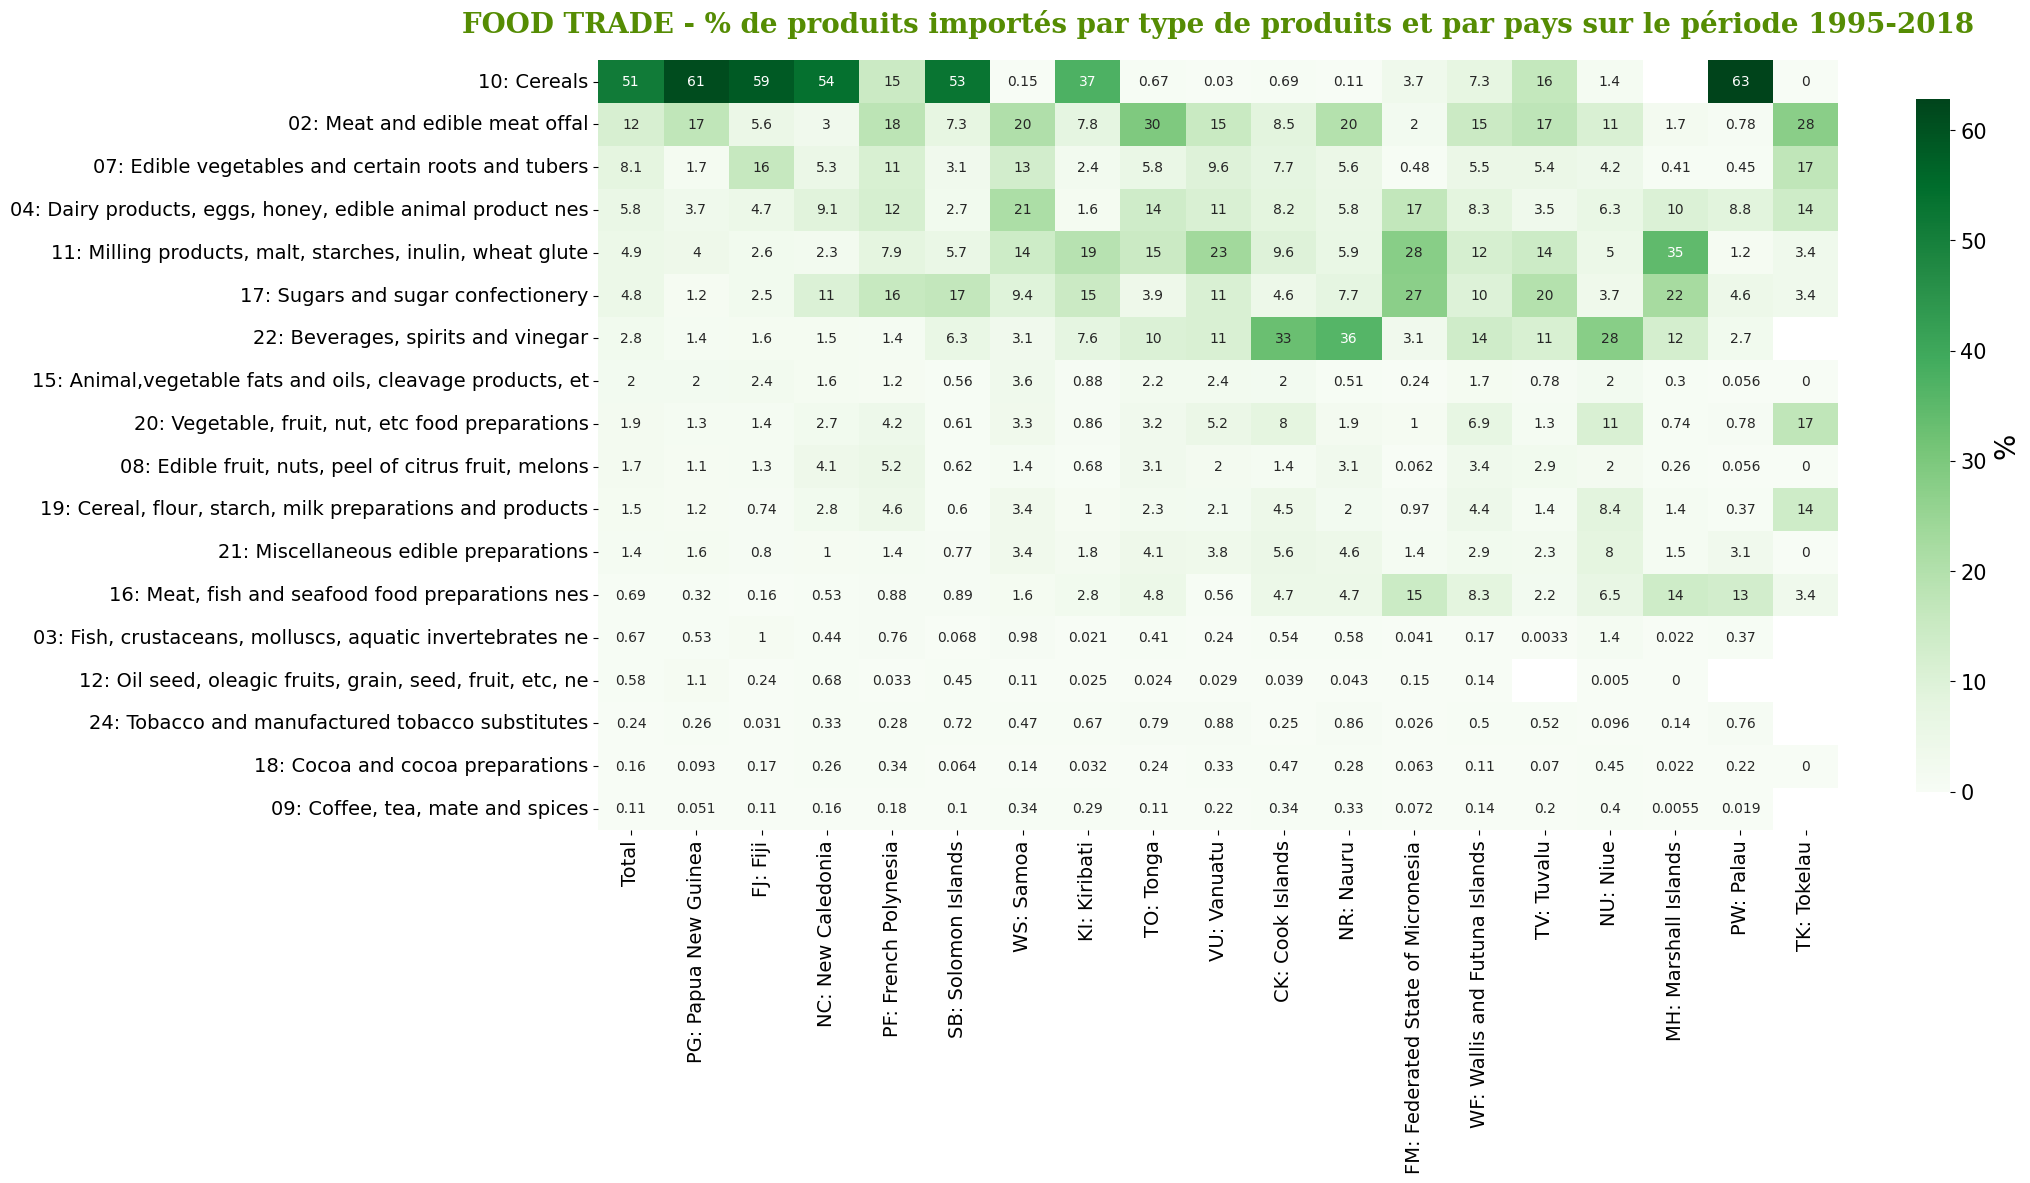

In [51]:
## GRAPHIQUE - heatmap legume
TITLE = "FOOD TRADE - % de produits importés par type de produits et par pays sur le période 1995-2018"
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10)) # Nombre et disposition des zones de dessin

ax.set_title(TITLE, fontdict={'family': 'serif','color' : '#558C03','weight': 'bold','size': 20},pad=20)
ax = sns.heatmap(df_pivot_commodity_importer, annot=True, square=False, cmap="Greens", cbar_kws={'label': '%', 'location' : 'right',"shrink": 0.9})
ax.set(xlabel="", ylabel="")
ax.figure.axes[-1].set_ylabel('%', size=20)
ax.figure.axes[-1].tick_params(labelsize=15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14, rotation=0)

In [112]:
df_importer_year = df_net.groupby(['IMPORTER: Importer','TIME_PERIOD: Time'], as_index=False).agg({'OBS_VALUE': 'sum'})
df_year = df_net.groupby(['TIME_PERIOD: Time'], as_index=False).agg({'OBS_VALUE': 'sum'})
dict_df_importer = {}
for pays in df_importer_year['IMPORTER: Importer'].unique():
    dict_df_importer[pays]=df_importer_year[df_importer_year['IMPORTER: Importer']==pays]

d = {'col1': [1, 2], 'col2': [3, 4]}

df = pd.DataFrame(data=d)
d = {}
for key, value in dict_df_importer.items():
    dict_df_importer[key]['PCT_CHANGE_MEAN'] = (dict_df_importer[key]['OBS_VALUE']-dict_df_importer[key]['OBS_VALUE'].mean())/dict_df_importer[key]['OBS_VALUE'].mean()*100
    dict_df_importer[key]['PCT_CHANGE'] = dict_df_importer[key]['OBS_VALUE'].pct_change() 
    dict_df_importer[key]['NORMALIZE'] = (dict_df_importer[key]['OBS_VALUE']-dict_df_importer[key]['OBS_VALUE'].mean())/dict_df_importer[key]['OBS_VALUE'].std()
    mean = dict_df_importer[key]['OBS_VALUE'].mean()
    std = dict_df_importer[key]['OBS_VALUE'].std()
    d[key]={'mean':mean, 'std':std, 'pct':std/mean}
df_importer_mean = pd.DataFrame(data=d) 
df_final = df_importer_mean.transpose().sort_values(by=['pct'], ascending=False)
print(df_final)

                                            mean           std       pct
PW: Palau                             224.250000    215.293177  0.960059
NR: Nauru                            3115.291667   2134.810255  0.685268
TV: Tuvalu                           1256.291667    827.394048  0.658600
FM: Federated State of Micronesia    2762.458333   1457.514739  0.527615
WF: Wallis and Futuna Islands        2525.250000   1307.429281  0.517743
SB: Solomon Islands                 21281.625000   9383.384927  0.440915
MH: Marshall Islands                  753.916667    294.783622  0.391003
NU: Niue                              826.333333    290.634488  0.351716
TK: Tokelau                             9.666667      2.886751  0.298629
KI: Kiribati                        12579.666667   3673.044356  0.291983
NC: New Caledonia                   68272.250000  16583.430345  0.242901
CK: Cook Islands                     9010.666667   2167.552931  0.240554
FJ: Fiji                           231825.625000  5

C:\Users\Sloutmyv\AppData\Local\Temp\ipykernel_14448\992642438.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dict_df_importer[key]['PCT_CHANGE_MEAN'] = (dict_df_importer[key]['OBS_VALUE']-dict_df_importer[key]['OBS_VALUE'].mean())/dict_df_importer[key]['OBS_VALUE'].mean()*100
C:\Users\Sloutmyv\AppData\Local\Temp\ipykernel_14448\992642438.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dict_df_importer[key]['PCT_CHANGE'] = dict_df_importer[key]['OBS_VALUE'].pct_change()
C:\Users\Sloutmyv\AppData\

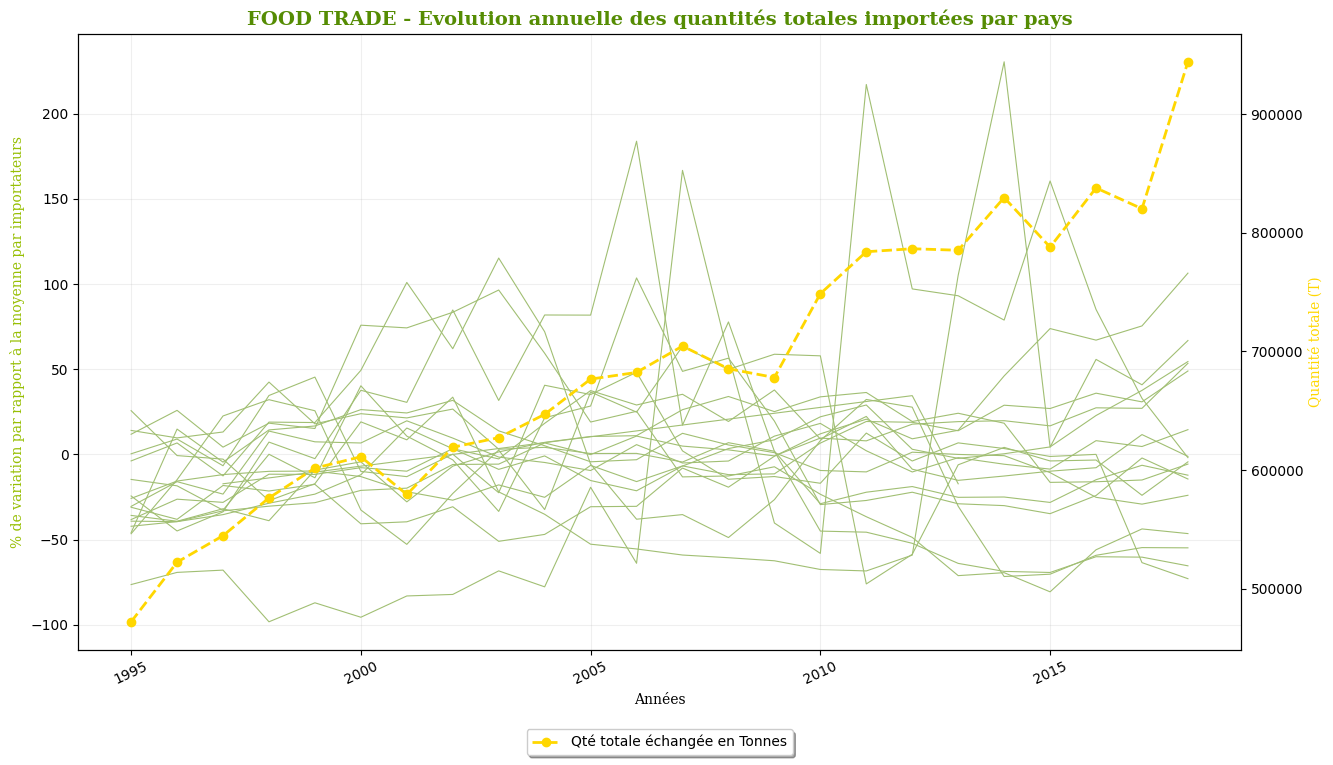

In [120]:
## GRAPHIQUE 
TITLE = "FOOD TRADE - Evolution annuelle des quantités totales importées par pays"

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,8)) # Nombre et disposition des zones de dessin

# Format date xaxis
plt.xticks(rotation=25)

# Axe 1
axes.set_title(TITLE, fontdict={'family': 'serif','color' : '#558C03','weight': 'bold','size': 14})
axes.set_xlabel("Années", fontdict={'family': 'serif','color' : 'black','weight': 'light','size': 10})
axes.set_ylabel("% de variation par rapport à la moyenne par importateurs", fontdict={'family': 'serif','color' : '#97BF04','weight': 'light','size': 10})

for key, value in dict_df_importer.items():
    axes.plot(dict_df_importer[key]['TIME_PERIOD: Time'],dict_df_importer[key]['PCT_CHANGE_MEAN'],'#A1BF73',linewidth=0.8,label=key)

# axes.legend(loc="center",bbox_to_anchor=(0,0,0.8,-0.4), ncol=1, fancybox=True, shadow=True)
# axes.set_ylim(34.2,34.6)

# Axe 2
axe2 = axes.twinx()
axe2.set_ylabel("Quantité totale (T)", fontdict={'family': 'serif','color' : 'gold','weight': 'light','size': 10})
axe2.plot(df_year['TIME_PERIOD: Time'],df_year.OBS_VALUE,'gold',linestyle='--', marker='o',linewidth=2,label="Qté totale échangée en Tonnes")
axe2.legend(loc="center",bbox_to_anchor=(0,0,1,-0.3), ncol=1, fancybox=True, shadow=True)
# axe2.set_ylim(34.2,34.6)

# Option grille
axes.grid(True,alpha=0.2)

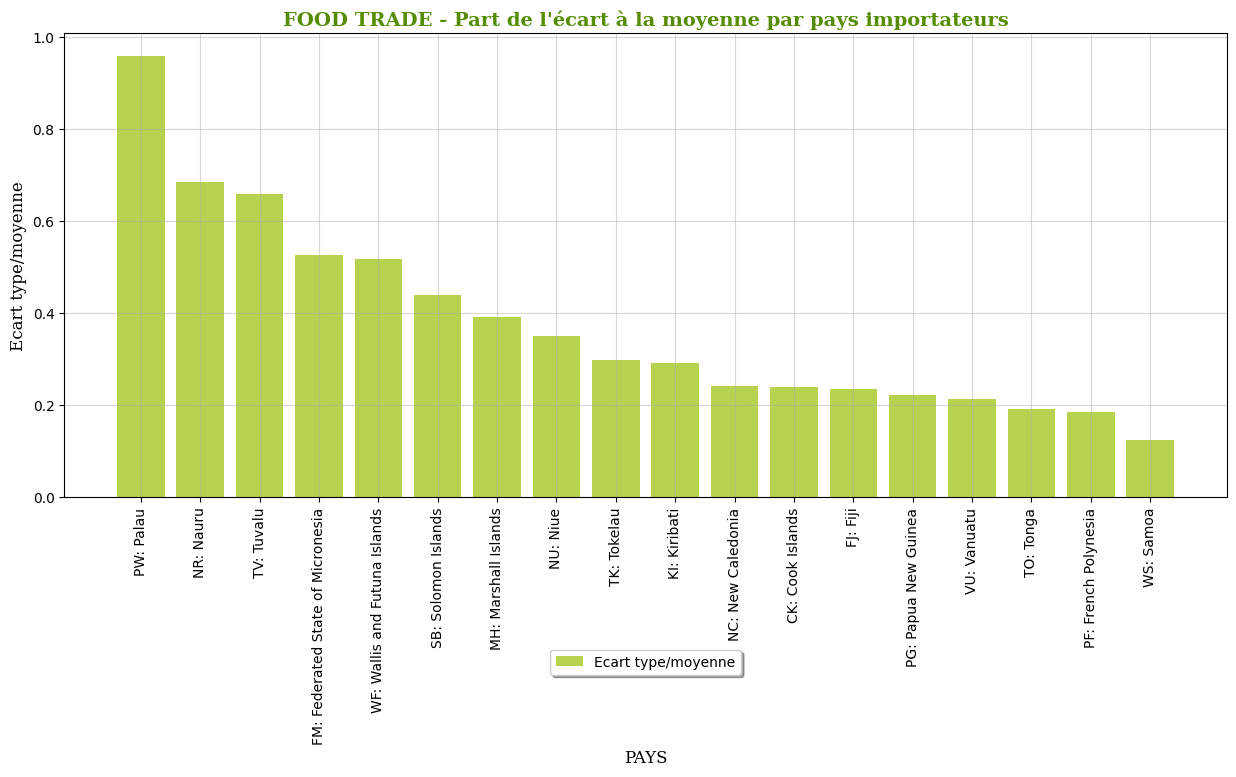

In [119]:
# 1 - Graphique
# Paramètres Titre
graph_title = "FOOD TRADE - Part de l'écart à la moyenne par pays importateurs"
title_family = 'serif'   # 'serif' | 'sans-serif' | 'cursive' | 'fantasy' | 'monospace'
title_color = '#558C03'
title_weight = 'bold'     # 'normal' | 'bold' | 'heavy' | 'light' | 'ultrabold' | 'ultralight'
title_size = 14
title_x = 0.5
title_y = 1

# Paramètres d'axes
x_label = "PAYS"
xtick_rotation = 90

xy_label_family = 'serif'
xy_label_color = 'black'
xy_label_weight = 'light'
xy_label_size = 12

y1_color = '#97BF04'
y1_alpha = 0.7
y1_label = 'Ecart type/moyenne'

y2_color = 'red'
y2_alpha = 0.7
y2_label = 'Valeur cumulée (%)'

graph_linestyle = 'solid'

# Paramètres grille
grid_alpha = 0.5

###########################################################################################################
fig, axe1 = plt.subplots(nrows=1, ncols=1, figsize=(15, 8), sharex=True)
fig.subplots_adjust(bottom=0.3)

plt.xticks(rotation=xtick_rotation)

# Axe n°1
axe1.set_title(graph_title, x=title_x, y=title_y, fontdict={'family': title_family, 'color': title_color, 'weight': title_weight, 'size': title_size})
axe1.set_xlabel(x_label, fontdict={'family': xy_label_family, 'color': xy_label_color, 'weight': xy_label_weight, 'size': xy_label_size})
axe1.set_ylabel(y1_label, fontdict={'family': xy_label_family, 'color': xy_label_color, 'weight': xy_label_weight, 'size': xy_label_size})

axe1.bar(df_final.index.values, df_final.pct,color=y1_color, alpha=y1_alpha, label=y1_label)
axe1.legend(loc="center", bbox_to_anchor=(0, 0, 1, -0.71),ncol=1, fancybox=True, shadow=True)
axe1.grid(True, alpha=grid_alpha)

# Axe n°2
# axe2 = axe1.twinx()
# axe2.set_ylabel(y2_label, fontdict={'family': xy_label_family, 'color': xy_label_color, 'weight': xy_label_weight, 'size': xy_label_size})

# axe2.plot(df_importer_raw.index.values, df_importer_raw.PCT_OBS_VALUE_CUMSUM,color=y2_color, linestyle=graph_linestyle, alpha=y2_alpha, label=y2_label)

# axe2.legend(loc="center", bbox_to_anchor=(0, 0, 1, -0.6),ncol=1, fancybox=True, shadow=True)
# axe2.set_ylim(0, 101)

In [128]:
df_produit_year = df_net.groupby(['COMMODITY: Commodity','TIME_PERIOD: Time'], as_index=False).agg({'OBS_VALUE': 'sum'})
df_year = df_net.groupby(['TIME_PERIOD: Time'], as_index=False).agg({'OBS_VALUE': 'sum'})
dict_df_produit = {}
for produit in df_produit_year['COMMODITY: Commodity'].unique():
    dict_df_produit[produit]=df_produit_year[df_produit_year['COMMODITY: Commodity']==produit]

# d = {'col1': [1, 2], 'col2': [3, 4]}

# df = pd.DataFrame(data=d)
# d = {}
for key, value in dict_df_produit.items():
    dict_df_produit[key]['PCT_CHANGE_MEAN'] = (dict_df_produit[key]['OBS_VALUE']-dict_df_produit[key]['OBS_VALUE'].mean())/dict_df_produit[key]['OBS_VALUE'].mean()*100
#     dict_df_importer[key]['PCT_CHANGE'] = dict_df_importer[key]['OBS_VALUE'].pct_change() 
#     dict_df_importer[key]['NORMALIZE'] = (dict_df_importer[key]['OBS_VALUE']-dict_df_importer[key]['OBS_VALUE'].mean())/dict_df_importer[key]['OBS_VALUE'].std()
#     mean = dict_df_importer[key]['OBS_VALUE'].mean()
#     std = dict_df_importer[key]['OBS_VALUE'].std()
#     d[key]={'mean':mean, 'std':std, 'pct':std/mean}
# df_importer_mean = pd.DataFrame(data=d) 
# df_final = df_importer_mean.transpose().sort_values(by=['pct'], ascending=False)
# print(df_final)

C:\Users\Sloutmyv\AppData\Local\Temp\ipykernel_14448\2706948318.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dict_df_produit[key]['PCT_CHANGE_MEAN'] = (dict_df_produit[key]['OBS_VALUE']-dict_df_produit[key]['OBS_VALUE'].mean())/dict_df_produit[key]['OBS_VALUE'].mean()*100
C:\Users\Sloutmyv\AppData\Local\Temp\ipykernel_14448\2706948318.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dict_df_produit[key]['PCT_CHANGE_MEAN'] = (dict_df_produit[key]['OBS_VALUE']-dict_df_produit[key]['OBS_VALUE'].mea

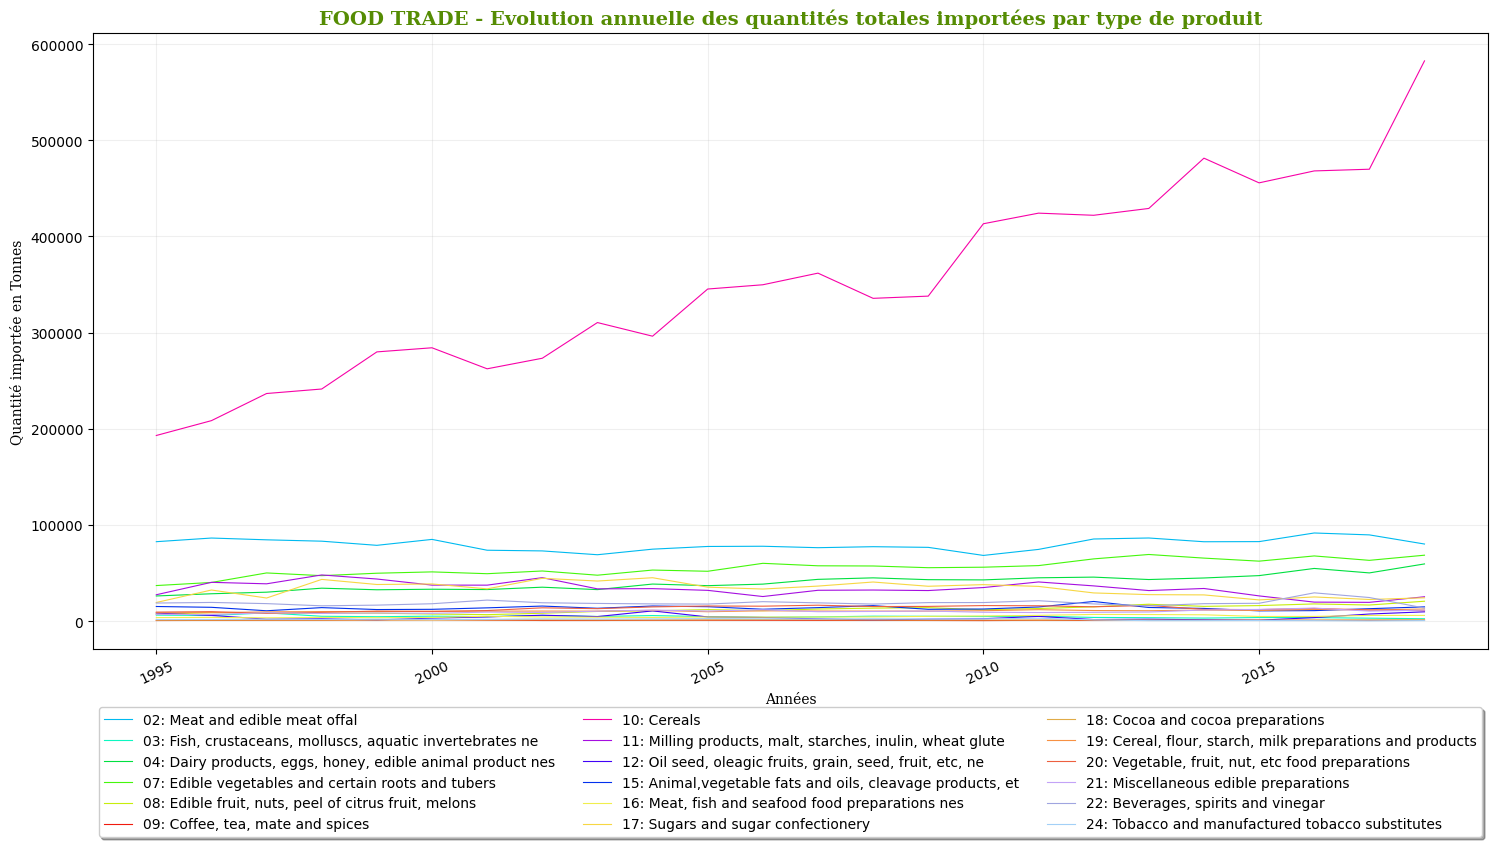

In [150]:
## GRAPHIQUE 
TITLE = "FOOD TRADE - Evolution annuelle des quantités totales importées par type de produit"

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18,8)) # Nombre et disposition des zones de dessin

# Format date xaxis
plt.xticks(rotation=25)

# Axe 1
axes.set_title(TITLE, fontdict={'family': 'serif','color' : '#558C03','weight': 'bold','size': 14})
axes.set_xlabel("Années", fontdict={'family': 'serif','color' : 'black','weight': 'light','size': 10})
axes.set_ylabel("Quantité importée en Tonnes", fontdict={'family': 'serif','color' : 'black','weight': 'light','size': 10})

color = ['#00BAF0','#0CF7C0','#00E040','#45F70C','#C7ED0C','#F01A0E','#F702A7','#A50EE0','#4102F7','#0231ED','#F0EE4D','#F7D743','#E0AB47','#F79143','#ED6040','#C3A3F7','#A0A5E0','#A3D0F7']
i = 0
for key, value in dict_df_produit.items():
    axes.plot(dict_df_produit[key]['TIME_PERIOD: Time'],dict_df_produit[key]['OBS_VALUE'],color[i],linewidth=0.8,label=key)
    i+=1

# axes.set_yscale('log')

axes.legend(loc="center",bbox_to_anchor=(0,0,1,-0.4), ncol=3, fancybox=True, shadow=True)
# axes.set_ylim(0,100000)

# # Axe 2
# axe2 = axes.twinx()
# axe2.set_ylabel("Quantité totale (T)", fontdict={'family': 'serif','color' : 'gold','weight': 'light','size': 10})
# axe2.plot(df_year['TIME_PERIOD: Time'],df_year.OBS_VALUE,'gold',linestyle='--', marker='o',linewidth=2,label="Qté totale échangée en Tonnes")
# axe2.legend(loc="center",bbox_to_anchor=(0,0,1,-0.3), ncol=1, fancybox=True, shadow=True)
# axe2.set_ylim(34.2,34.6)

# Option grille
axes.grid(True,alpha=0.2)

In [164]:
df_cereal = df_net[df_net['COMMODITY: Commodity']=='10: Cereals']
df_cereal_year = df_cereal.groupby(['IMPORTER: Importer','TIME_PERIOD: Time'], as_index=False).agg({'OBS_VALUE': 'sum'})
df_pivot_cereal_year = df_cereal_year.pivot_table(columns='IMPORTER: Importer', index='TIME_PERIOD: Time', values='OBS_VALUE')
df_pivot_cereal_year.loc[:,'Total'] = df_pivot_cereal_year.sum(numeric_only=True, axis=1)
df_pivot_cereal_year = df_pivot_cereal_year.sort_values(by=['Total'], ascending=False)
df_pivot_cereal_year = df_pivot_cereal_year[df_pivot_cereal_year.sum().sort_values(ascending = False).index]
df_pivot_cereal_year=df_pivot_cereal_year.drop("Total", axis=1)
# df_pivot_cereal_year = df_pivot_cereal_year.iloc[:, :].apply(lambda x: (x*100 / x.sum()))
print(df_pivot_cereal_year)

IMPORTER: Importer  PG: Papua New Guinea  FJ: Fiji  NC: New Caledonia  \
TIME_PERIOD: Time                                                       
2018                            278639.0  245965.0            35843.0   
2014                            213064.0  184201.0            51023.0   
2017                            230640.0  191288.0            31647.0   
2016                            229373.0  182412.0            29416.0   
2015                            217624.0  177675.0            28680.0   
2013                            167977.0  181364.0            51460.0   
2011                            187455.0  159716.0            54520.0   
2012                            168850.0  178948.0            47373.0   
2010                            180559.0  160163.0            54025.0   
2007                            155634.0  136456.0            47810.0   
2006                            136828.0  146820.0            40737.0   
2005                            161016.0  124623.0 

[Text(0, 0.5, '2018'),
 Text(0, 1.5, '2014'),
 Text(0, 2.5, '2017'),
 Text(0, 3.5, '2016'),
 Text(0, 4.5, '2015'),
 Text(0, 5.5, '2013'),
 Text(0, 6.5, '2011'),
 Text(0, 7.5, '2012'),
 Text(0, 8.5, '2010'),
 Text(0, 9.5, '2007'),
 Text(0, 10.5, '2006'),
 Text(0, 11.5, '2005'),
 Text(0, 12.5, '2009'),
 Text(0, 13.5, '2008'),
 Text(0, 14.5, '2003'),
 Text(0, 15.5, '2004'),
 Text(0, 16.5, '2000'),
 Text(0, 17.5, '1999'),
 Text(0, 18.5, '2002'),
 Text(0, 19.5, '2001'),
 Text(0, 20.5, '1998'),
 Text(0, 21.5, '1997'),
 Text(0, 22.5, '1996'),
 Text(0, 23.5, '1995')]

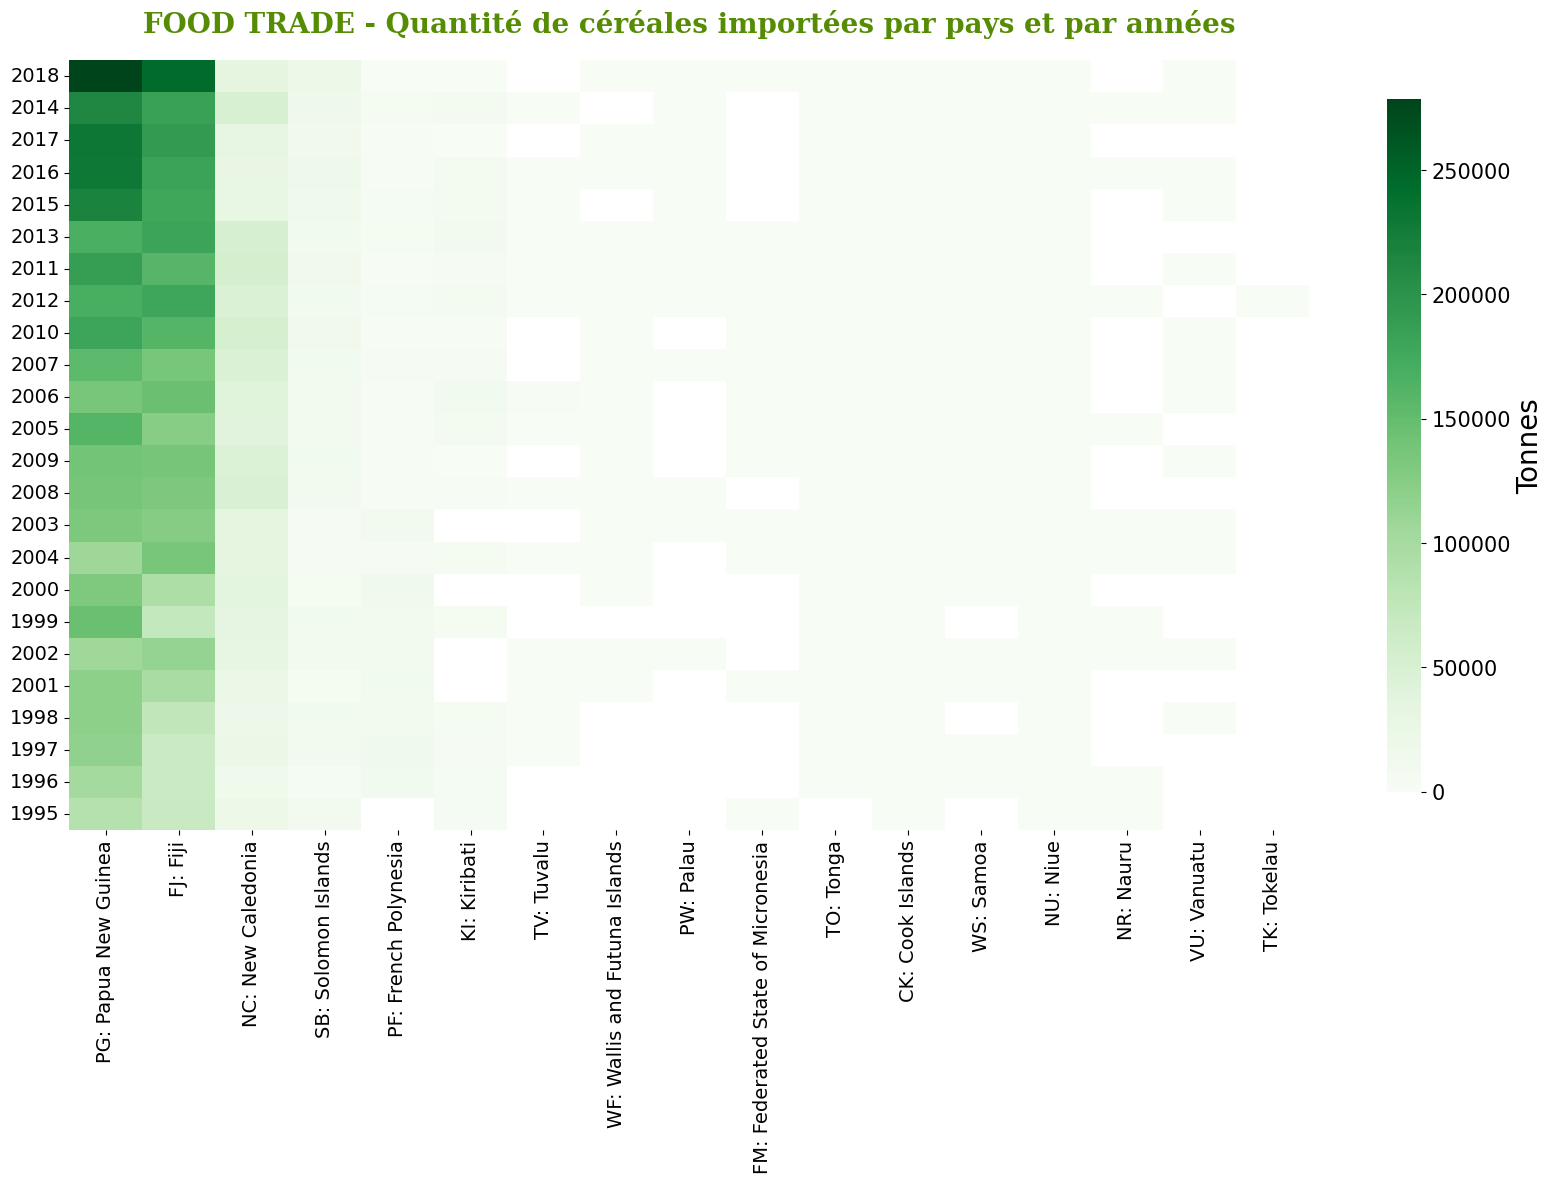

In [167]:
## GRAPHIQUE - heatmap legume
TITLE = "FOOD TRADE - Quantité de céréales importées par pays et par années"
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10)) # Nombre et disposition des zones de dessin

ax.set_title(TITLE, fontdict={'family': 'serif','color' : '#558C03','weight': 'bold','size': 20},pad=20)
ax = sns.heatmap(df_pivot_cereal_year, annot=False, square=False, cmap="Greens", cbar_kws={'label': 'Tonnes', 'location' : 'right',"shrink": 0.9})
ax.set(xlabel="", ylabel="")
ax.figure.axes[-1].set_ylabel('Tonnes', size=20)
ax.figure.axes[-1].tick_params(labelsize=15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14, rotation=0)

In [181]:
df_samoa= df_net[df_net['IMPORTER: Importer']=='WS: Samoa'] 
df_samoa_year = df_samoa.groupby(['COMMODITY: Commodity','TIME_PERIOD: Time'], as_index=False).agg({'OBS_VALUE': 'sum'})
df_pivot_samoa_year = df_samoa_year.pivot_table(columns='COMMODITY: Commodity', index='TIME_PERIOD: Time', values='OBS_VALUE')
df_pivot_samoa_year.loc[:,'Total'] = df_pivot_samoa_year.sum(numeric_only=True, axis=1)
# df_pivot_samoa_year = df_pivot_samoa_year.sort_values(by=['Total'], ascending=False)
df_pivot_samoa_year = df_pivot_samoa_year[df_pivot_samoa_year.sum().sort_values(ascending = False).index]
df_pivot_samoa_year=df_pivot_samoa_year.drop("Total", axis=1)
# df_pivot_cereal_year = df_pivot_cereal_year.iloc[:, :].apply(lambda x: (x*100 / x.sum()))
# print(df_pivot_samoa_year)


df_palau= df_net[df_net['IMPORTER: Importer']=='PW: Palau'] 
df_palau_year = df_palau.groupby(['COMMODITY: Commodity','TIME_PERIOD: Time'], as_index=False).agg({'OBS_VALUE': 'sum'})
df_pivot_palau_year = df_palau_year.pivot_table(columns='COMMODITY: Commodity', index='TIME_PERIOD: Time', values='OBS_VALUE')
df_pivot_palau_year.loc[:,'Total'] = df_pivot_palau_year.sum(numeric_only=True, axis=1)
# df_pivot_palau_year = df_pivot_palau_year.sort_values(by=['Total'], ascending=False)
df_pivot_palau_year = df_pivot_palau_year[df_pivot_palau_year.sum().sort_values(ascending = False).index]
df_pivot_palau_year=df_pivot_palau_year.drop("Total", axis=1)
# df_pivot_cereal_year = df_pivot_cereal_year.iloc[:, :].apply(lambda x: (x*100 / x.sum()))
print(df_pivot_palau_year)

COMMODITY: Commodity  10: Cereals  \
TIME_PERIOD: Time                   
1995                          NaN   
1996                          NaN   
1997                          NaN   
1998                          NaN   
1999                          NaN   
2000                          NaN   
2001                          NaN   
2002                          4.0   
2003                          6.0   
2004                          NaN   
2005                          NaN   
2006                          NaN   
2007                        465.0   
2008                        250.0   
2009                          NaN   
2010                          NaN   
2011                        502.0   
2012                        368.0   
2013                        357.0   
2014                        336.0   
2015                        481.0   
2016                        289.0   
2017                        234.0   
2018                         90.0   

COMMODITY: Commodity  16: Meat, fish 

[Text(0, 0.5, '1995'),
 Text(0, 1.5, '1996'),
 Text(0, 2.5, '1997'),
 Text(0, 3.5, '1998'),
 Text(0, 4.5, '1999'),
 Text(0, 5.5, '2000'),
 Text(0, 6.5, '2001'),
 Text(0, 7.5, '2002'),
 Text(0, 8.5, '2003'),
 Text(0, 9.5, '2004'),
 Text(0, 10.5, '2005'),
 Text(0, 11.5, '2006'),
 Text(0, 12.5, '2007'),
 Text(0, 13.5, '2008'),
 Text(0, 14.5, '2009'),
 Text(0, 15.5, '2010'),
 Text(0, 16.5, '2011'),
 Text(0, 17.5, '2012'),
 Text(0, 18.5, '2013'),
 Text(0, 19.5, '2014'),
 Text(0, 20.5, '2015'),
 Text(0, 21.5, '2016'),
 Text(0, 22.5, '2017'),
 Text(0, 23.5, '2018')]

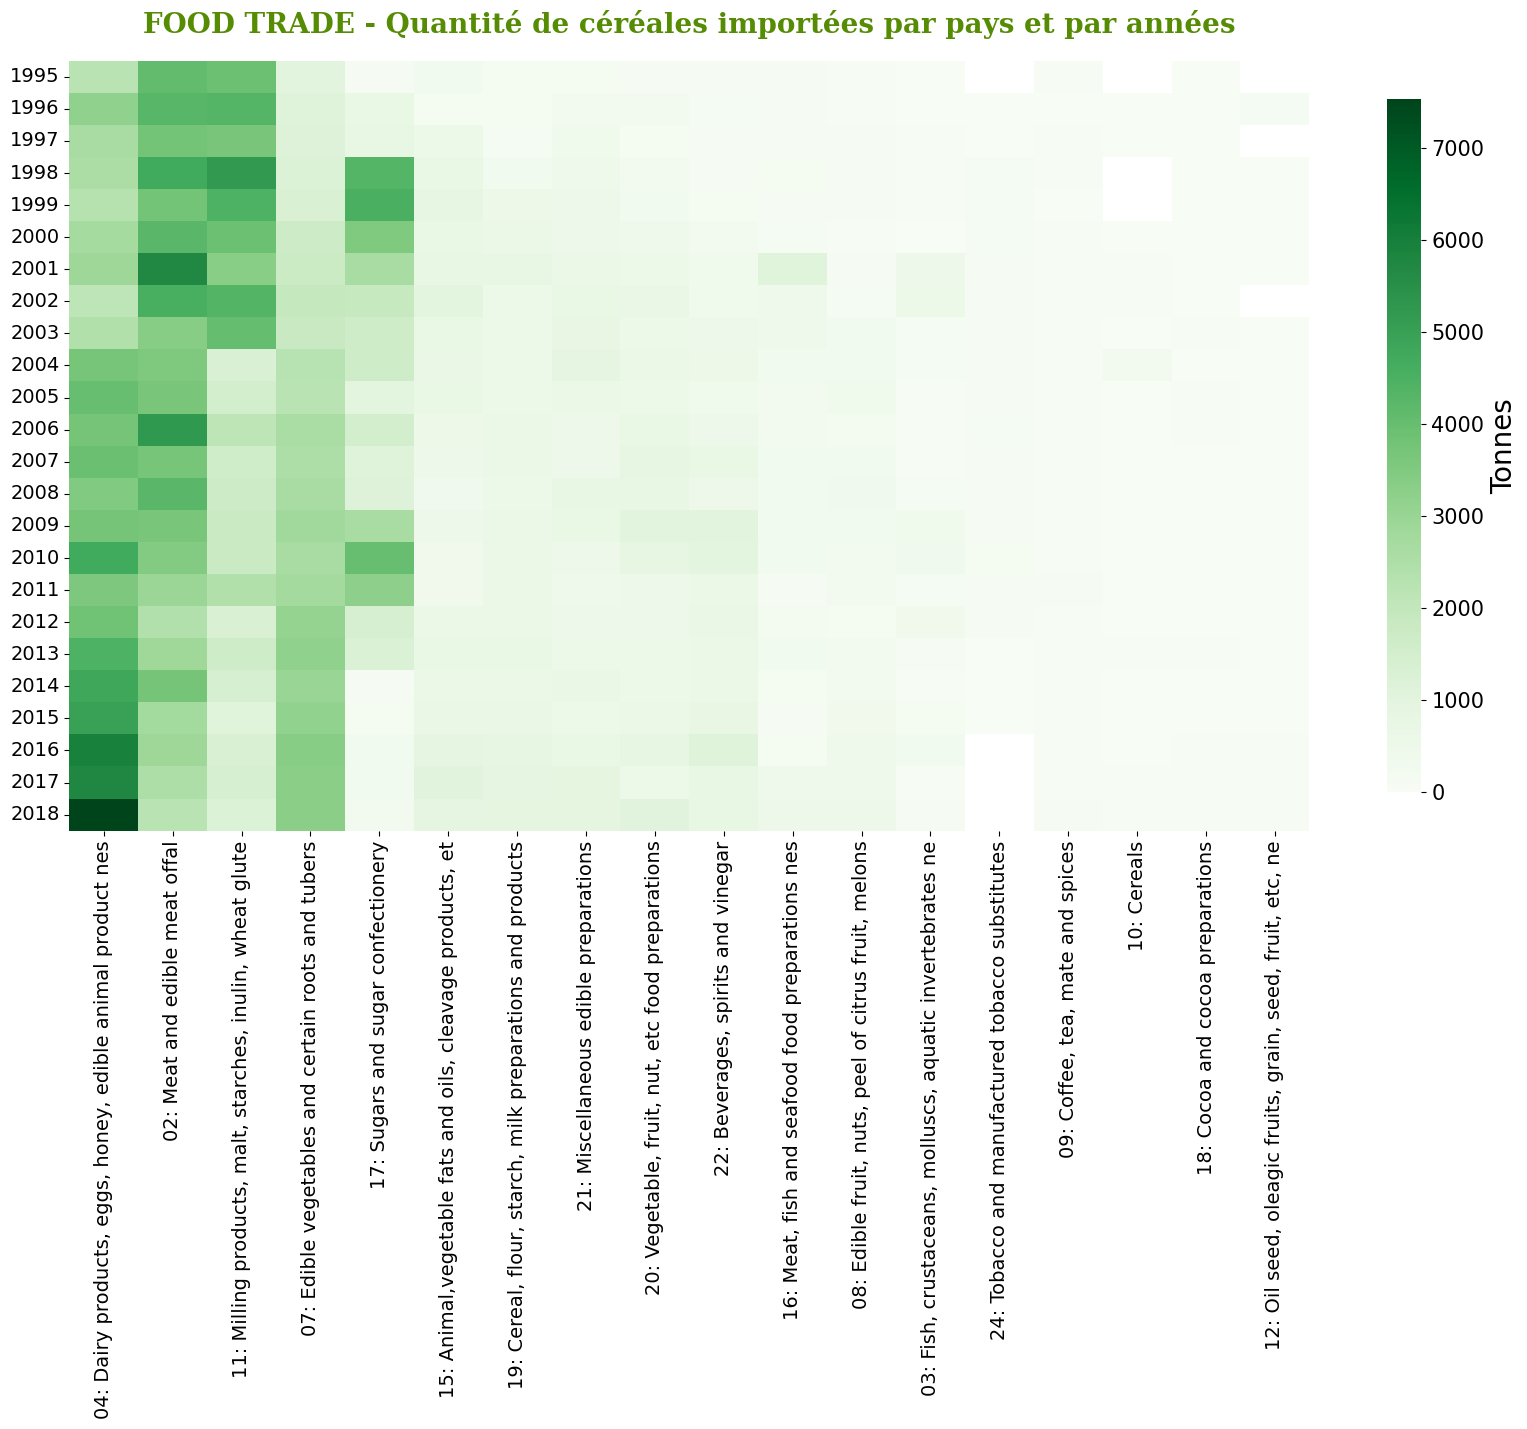

In [180]:
## GRAPHIQUE - heatmap legume
TITLE = "FOOD TRADE - Quantité de céréales importées par pays et par années"
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10)) # Nombre et disposition des zones de dessin

ax.set_title(TITLE, fontdict={'family': 'serif','color' : '#558C03','weight': 'bold','size': 20},pad=20)
ax = sns.heatmap(df_pivot_samoa_year, annot=False, square=False, cmap="Greens", cbar_kws={'label': 'Tonnes', 'location' : 'right',"shrink": 0.9})
ax.set(xlabel="", ylabel="")
ax.figure.axes[-1].set_ylabel('Tonnes', size=20)
ax.figure.axes[-1].tick_params(labelsize=15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14, rotation=0)

[Text(0, 0.5, '1995'),
 Text(0, 1.5, '1996'),
 Text(0, 2.5, '1997'),
 Text(0, 3.5, '1998'),
 Text(0, 4.5, '1999'),
 Text(0, 5.5, '2000'),
 Text(0, 6.5, '2001'),
 Text(0, 7.5, '2002'),
 Text(0, 8.5, '2003'),
 Text(0, 9.5, '2004'),
 Text(0, 10.5, '2005'),
 Text(0, 11.5, '2006'),
 Text(0, 12.5, '2007'),
 Text(0, 13.5, '2008'),
 Text(0, 14.5, '2009'),
 Text(0, 15.5, '2010'),
 Text(0, 16.5, '2011'),
 Text(0, 17.5, '2012'),
 Text(0, 18.5, '2013'),
 Text(0, 19.5, '2014'),
 Text(0, 20.5, '2015'),
 Text(0, 21.5, '2016'),
 Text(0, 22.5, '2017'),
 Text(0, 23.5, '2018')]

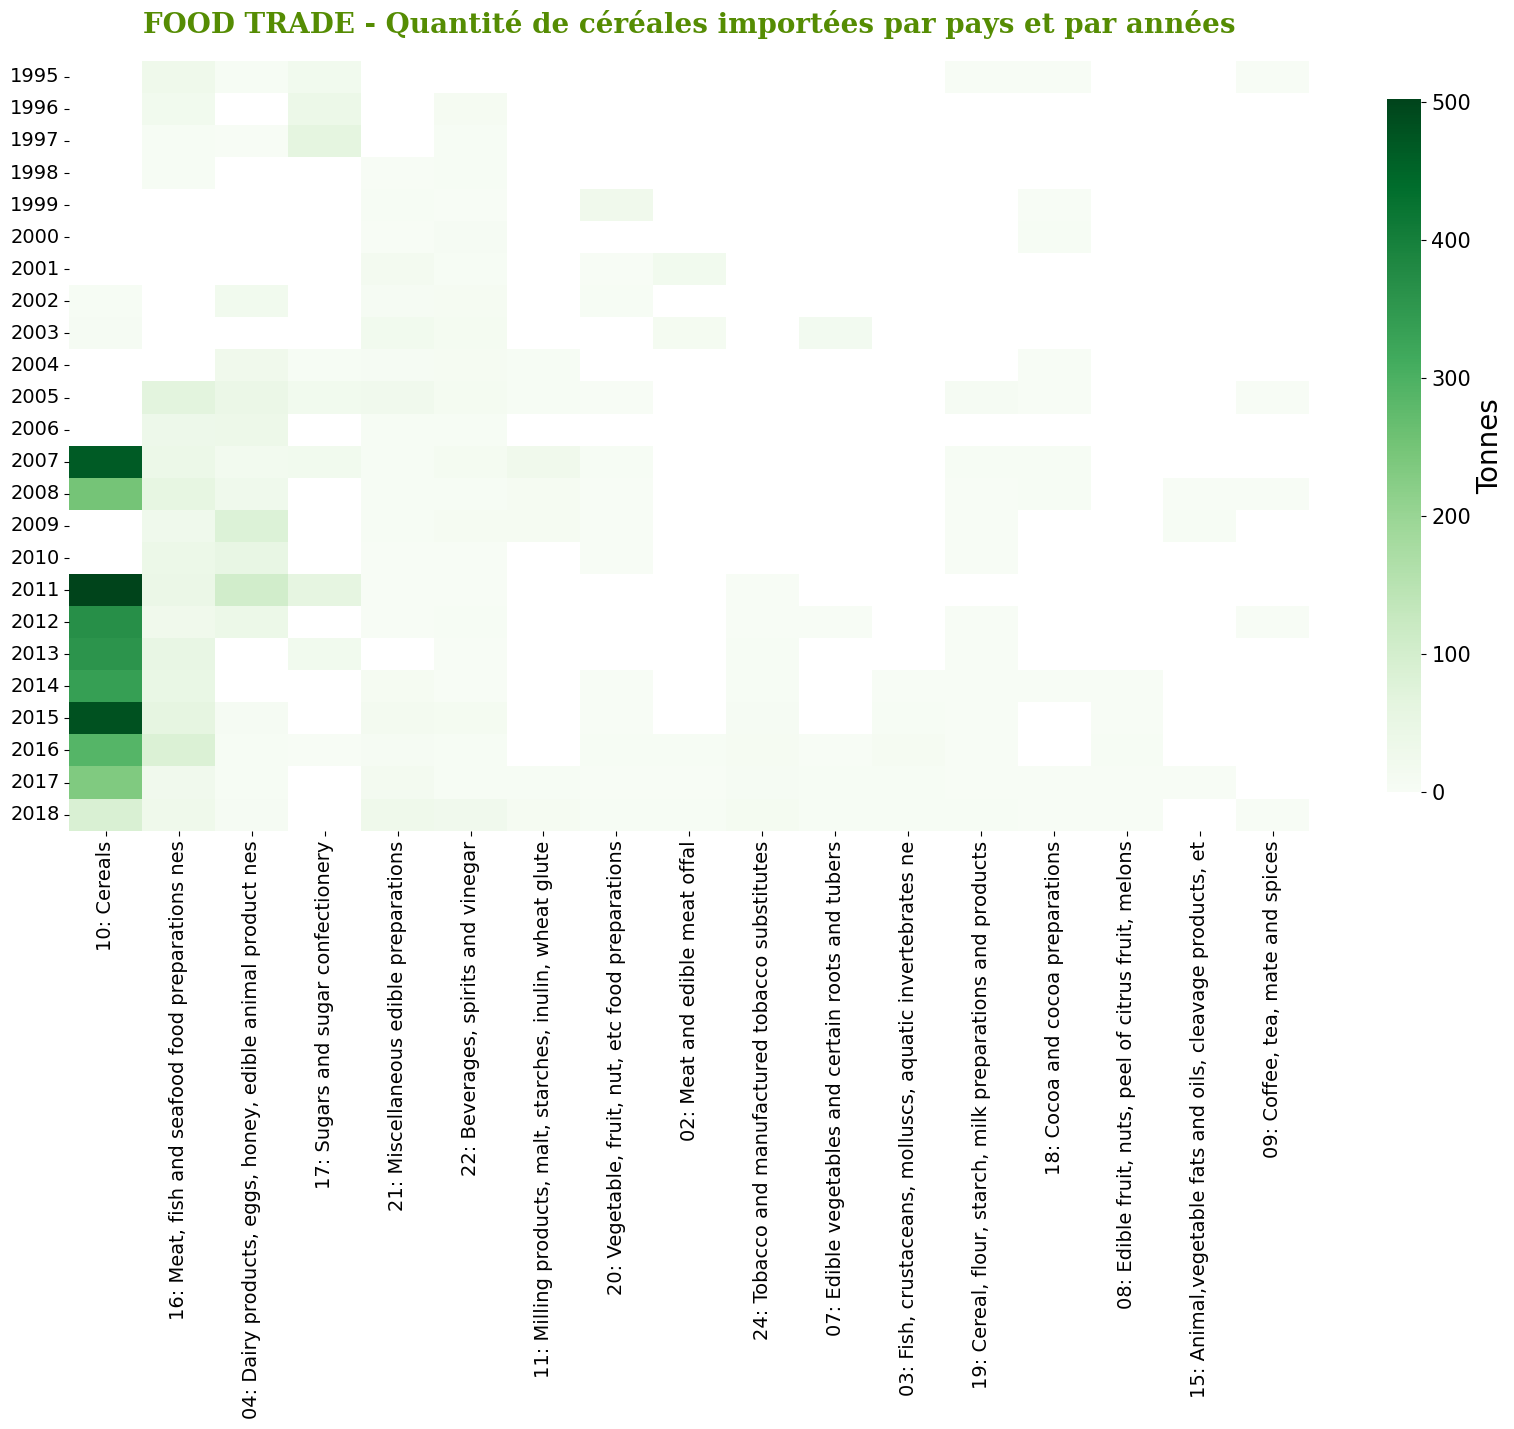

In [182]:
## GRAPHIQUE - heatmap legume
TITLE = "FOOD TRADE - Quantité de céréales importées par pays et par années"
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10)) # Nombre et disposition des zones de dessin

ax.set_title(TITLE, fontdict={'family': 'serif','color' : '#558C03','weight': 'bold','size': 20},pad=20)
ax = sns.heatmap(df_pivot_palau_year, annot=False, square=False, cmap="Greens", cbar_kws={'label': 'Tonnes', 'location' : 'right',"shrink": 0.9})
ax.set(xlabel="", ylabel="")
ax.figure.axes[-1].set_ylabel('Tonnes', size=20)
ax.figure.axes[-1].tick_params(labelsize=15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14, rotation=0)

In [214]:
file_name = "TWB_POP.csv"
file_path = "data/THEWORLDBANK/"

# Open CSV file in pandas
df_raw_2 = pd.read_csv(file_path + file_name,sep = ';',index_col=0)
df_final = df_raw_2.transpose()
df_final = df_final.iloc[:, :].apply(lambda x: (x*100 / x.iloc[0])-100)

print(df_final.columns.to_list())
print(df_final)

['Samoa américaines', 'Fidji', 'Micronésie', 'Kiribati', 'Îles Marshall', 'Nouvelle-Calédonie', 'Nauru', 'Palaos', 'Papouasie-Nouvelle-Guinée', 'Polynésie française', 'Îles Salomon', 'Tonga', 'Tuvalu', 'Vanuatu', 'Samoa']
Country Name  Samoa américaines      Fidji  Micronésie   Kiribati  \
1995                   0.000000   0.000000    0.000000   0.000000   
1996                   2.058014   0.541751    0.414219   1.658055   
1997                   4.076703   1.555830    0.729643   3.469521   
1998                   5.996142   2.739174    0.977087   5.306759   
1999                   7.851913   3.935141    1.097636   7.128042   
2000                   9.042902   5.082134    1.251722   9.014371   
2001                   9.218928   6.194288    1.468349  11.106884   
2002                   8.943653   7.276149    1.508230  13.400670   
2003                   8.501713   8.338319    1.338735  15.734957   
2004                   7.911837   9.397081    1.006091  18.093789   
2005               

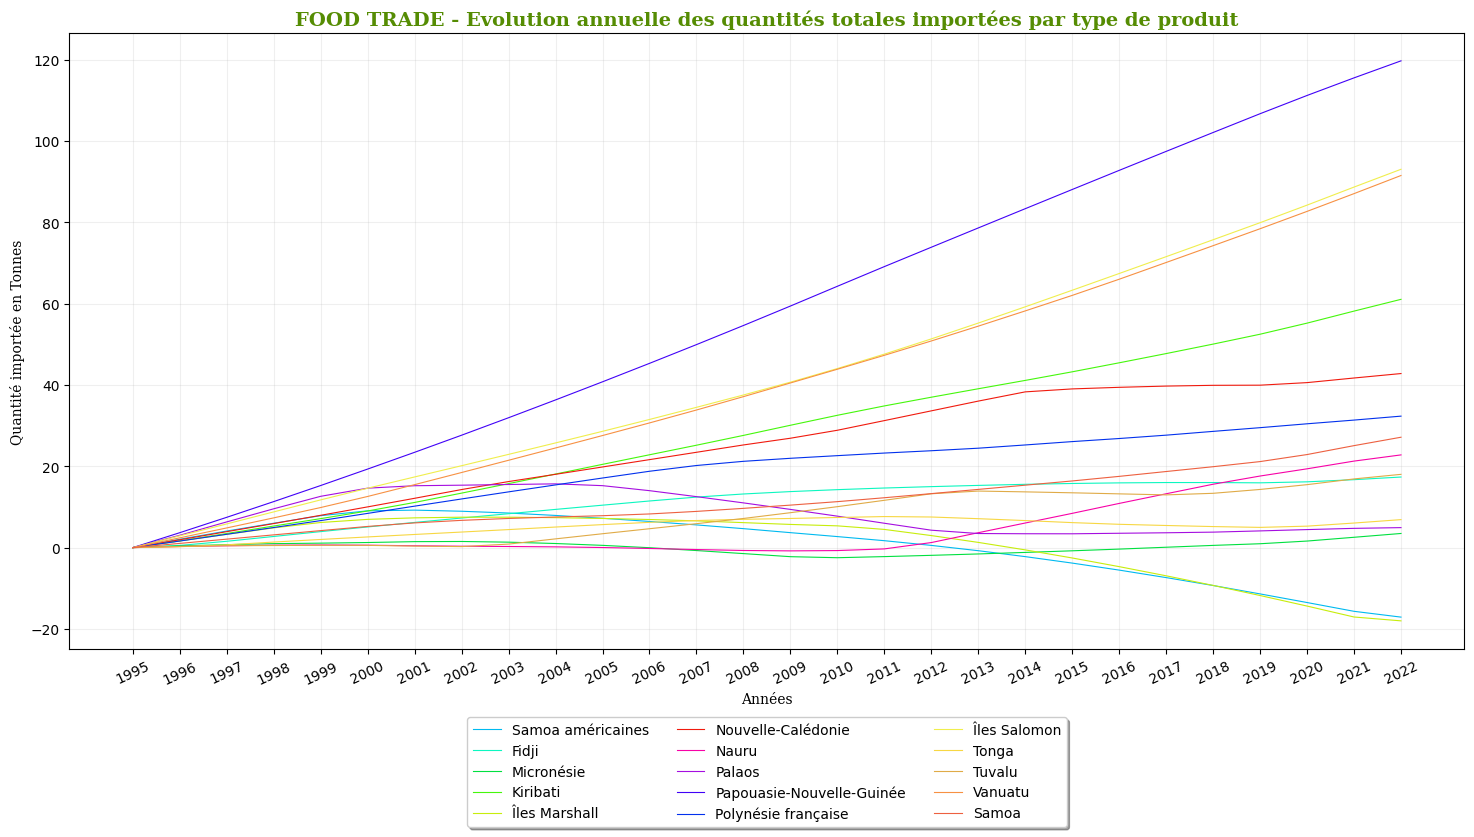

In [215]:
## GRAPHIQUE 
TITLE = "FOOD TRADE - Evolution annuelle des quantités totales importées par type de produit"

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18,8)) # Nombre et disposition des zones de dessin

# Format date xaxis
plt.xticks(rotation=25)

# Axe 1
axes.set_title(TITLE, fontdict={'family': 'serif','color' : '#558C03','weight': 'bold','size': 14})
axes.set_xlabel("Années", fontdict={'family': 'serif','color' : 'black','weight': 'light','size': 10})
axes.set_ylabel("Quantité importée en Tonnes", fontdict={'family': 'serif','color' : 'black','weight': 'light','size': 10})

color = ['#00BAF0','#0CF7C0','#00E040','#45F70C','#C7ED0C','#F01A0E','#F702A7','#A50EE0','#4102F7','#0231ED','#F0EE4D','#F7D743','#E0AB47','#F79143','#ED6040','#C3A3F7','#A0A5E0','#A3D0F7']
i = 0
for pays in df_final.columns.to_list():
    axes.plot(df_final.index.values,df_final[pays],color[i],linewidth=0.8,label=pays)
    i+=1

# axes.set_yscale('log')

axes.legend(loc="center",bbox_to_anchor=(0,0,1,-0.4), ncol=3, fancybox=True, shadow=True)
# axes.set_ylim(0,100000)

# # Axe 2
# axe2 = axes.twinx()
# axe2.set_ylabel("Quantité totale (T)", fontdict={'family': 'serif','color' : 'gold','weight': 'light','size': 10})
# axe2.plot(df_year['TIME_PERIOD: Time'],df_year.OBS_VALUE,'gold',linestyle='--', marker='o',linewidth=2,label="Qté totale échangée en Tonnes")
# axe2.legend(loc="center",bbox_to_anchor=(0,0,1,-0.3), ncol=1, fancybox=True, shadow=True)
# axe2.set_ylim(34.2,34.6)

# Option grille
axes.grid(True,alpha=0.2)